In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors, cm

from mypackage import *

# Plotting VLATcov modeled correlation function on the sphere

For the univariate case, the model used to describe correlation functions results from the theorem 1 of Paciorek and Schervish (2004), which states that for any homogeneous correlation $\rho^h(||\mathbf{x}-\mathbf{y}||)$ in $\mathbb{R}^d$ of aspect-tensor $\mathbf{I}_d$ and any differential field of symmetric definite positive tensor $\mathbf{s}$, it is possible to form a heterogeneous correlation function $\rho$ defined by :
\begin{equation}
\label{eq:paciorek}
\rho(\mathbf{s})(\mathbf{x},\mathbf{x}+\delta \mathbf{x}) = 
\frac{|\mathbf{s_x}|^{1/4} |\mathbf{s_{\mathbf{x}+\delta \mathbf{x}}}|^{1/4} }
{|\frac{1}{2} (\mathbf{s_x} + \mathbf{s}_{\mathbf{x}+\delta \mathbf{x}})|^{1/2}} 
\rho^h \left( 
||\delta \mathbf{x}||_{[\frac{1}{2}(\mathbf{s_x}+\mathbf{s}_{\mathbf{x}+\delta \mathbf{x}})]^{-1}}
\right)
\end{equation}


In the spherical case, $\mathbb{S}^2$ is seen as $\mathbb{R}^2$. Two points $\mathbf{x}$ and $\mathbf{y}$ are written in spherical coordinates. The aspect tensor is also written in spherical coordinates, that is 

\begin{equation}
\mathbf{s} = 
\left(\begin{array} \\
s_{\theta\theta} & s_{\theta\varphi} \\
s_{\varphi\theta} & s_{\varphi\varphi} \\
\end{array} \right).
\end{equation}


It is not obvious in spherical coordinates how to write $\mathbf{y}$ as $\mathbf{y} = \mathbf{x} + \delta \mathbf{x}$. More precisely, what are ($\delta \theta, \delta \varphi$) in $\delta \mathbf{x}$ ?

Remember

__Plan :__

1. A lat/lon grid is defined.

2. We explicit a method for computing $\delta \mathbf{x} = \mathbf{x} - \mathbf{y}$ for any $\mathbf{x}$ and $\mathbf{y}$. 

3. We define an isotropic (homogeneous) aspect-tensor $\mathbf{s}$ on the sphere.

4. We plot some correlation functions to assess the isotropic character of the correlation functions.

## 1. Defining the lat/lon grid

In [2]:
n = 720
grid = LatLonGrid(n)

# 2. $\delta \mathbf{x}$ in spherical coordinates

Given a point of reference $\mathbf{x}$ from which we want to compute the correlation function, we need to evaluate $\mathbf{y} - \mathbf{x} = \delta \mathbf{x}$ for any $\mathbf{y}\in \mathbb{S}^2$. This quantity  decomposes into

$$
\begin{equation}
\delta \mathbf{x} = \left( \begin{array} \\ \delta \theta \\ \delta \varphi \\ \end{array} \right)
\end{equation}
$$

with $(\delta \theta, \delta \varphi) \in ]-\pi/2,\pi/2[\times]-\pi,\pi[$.

**To evaluate them**
 - we apply the rotation $ \mathbf{R} \in SO(3)$ that maps $\vec{\mathbf{x}}$ to $\vec{\mathbf{e}_x}$
 - we remind that $\vec{\mathbf{e}_x}$ is the center of the planisphere $ ]-\pi/2,\pi/2[\times]-\pi,\pi[$.
 - $\mathbf{R} \vec{\mathbf{y}}$ written in spherical coordinates is exactly $\delta \mathbf{x}$

##  3. Defining an isotropic metric tensor

In [3]:
metric_tensor = np.zeros((2,2,grid.m,grid.n))

lh = 0.15
metric_tensor[0,0] = 1/lh**2  #g_thetatheta
metric_tensor[1,1] = 1/lh**2  #g_varphivarphi

## 4. Plotting correlation functions

In [4]:
def correlation_model(metric_tensor, dx, pos):
#     avg_mt = 0.5* (metric_tensor + metric_tensor[:,:,pos[0],pos[1]][:,:,np.newaxis,np.newaxis])
    avg_mt = metric_tensor
    out = avg_mt[0,0]*dx[:,:,0]**2 \
            + 2*avg_mt[0,1]*dx[:,:,0]*dx[:,:,1]  \
                + avg_mt[1,1]*dx[:,:,1]**2
    
    return np.exp(-out)

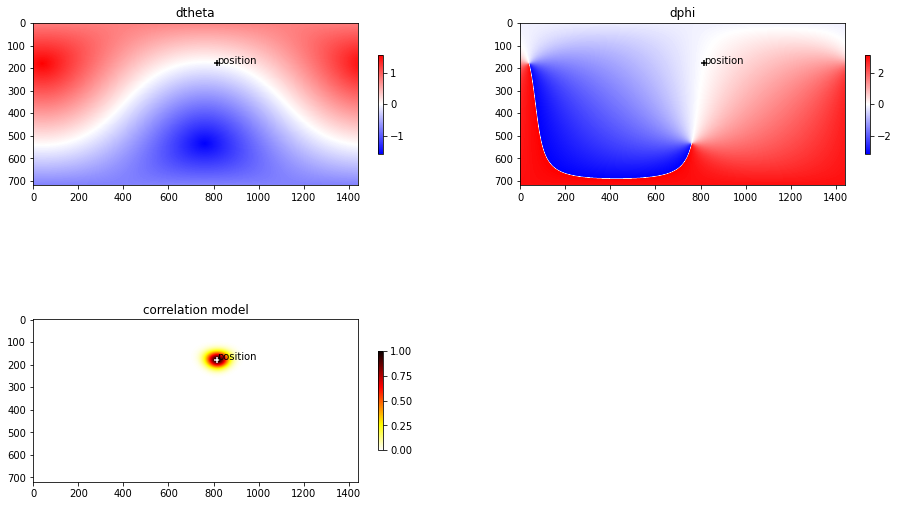

In [5]:
pos = (np.random.randint(0,grid.m),np.random.randint(0,grid.n))
POS = grid.THETA * 0
POS[pos] = 1

dx = grid.dx_frompoint(pos)

dx1, dx2 = dx[:,:,0], dx[:,:,1]

cor_func_val = correlation_model(metric_tensor, dx, pos)

plt.figure(figsize=(16,10))

from matplotlib import colors
divnorm=colors.TwoSlopeNorm(vmin=dx1.min(), vcenter=0., vmax=dx1.max())

plt.subplot(221,title='dtheta')
plt.imshow(dx1.T,cmap='bwr',norm=divnorm);plt.colorbar(shrink=0.4);plt.scatter(*pos,marker='+',c='k');plt.text(*pos,'position');

plt.subplot(222,title='dphi')
divnorm=colors.TwoSlopeNorm(vmin=dx2.min(), vcenter=0., vmax=dx2.max())
plt.imshow(dx2.T,cmap='bwr',norm=divnorm);plt.colorbar(shrink=0.4);plt.scatter(*pos,marker='+',c='k');plt.text(*pos,'position');

plt.subplot(223,title='correlation model')
divnorm=colors.Normalize(vmin=0, vmax=cor_func_val.max())
plt.imshow(cor_func_val.T,cmap='hot_r',norm=divnorm);plt.colorbar(shrink=0.4);plt.scatter(*pos,marker='+',c='w');plt.text(*pos,'position');

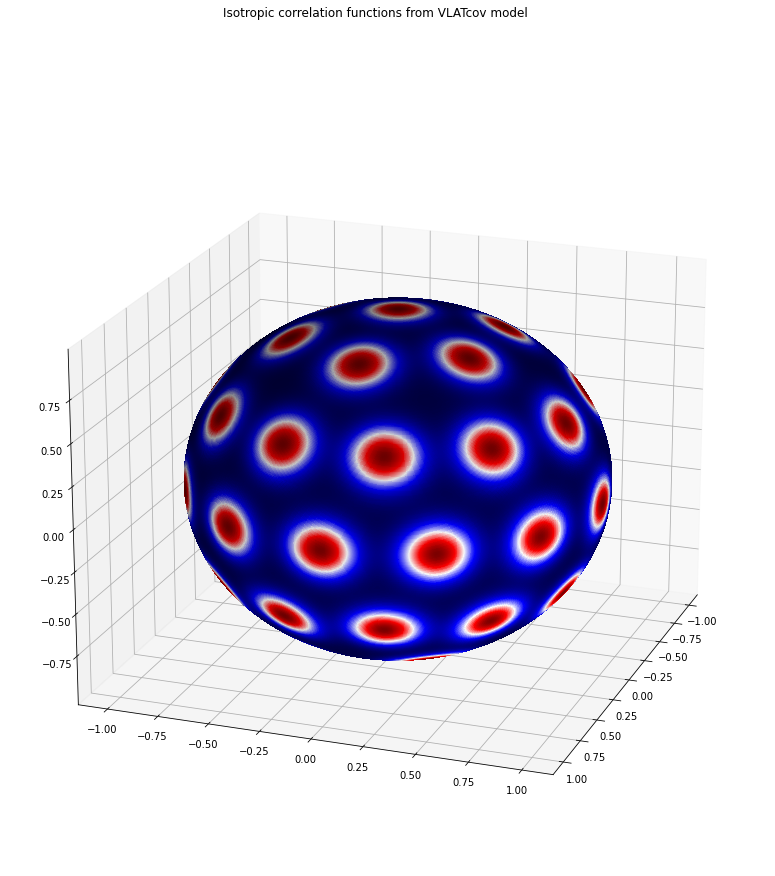

In [7]:
k=7
locations_indexes = grid.regular_points_generator_for_sphere(k)
dxs = [grid.dx_frompoint(pos) for pos in locations_indexes]

sum_cor_funcs = np.array([correlation_model(metric_tensor, dx, pos) for pos, dx in \
                      zip(locations_indexes, dxs)]).sum(axis=0)


grid.sphere_plot(sum_cor_funcs,
                 figsize=(12,14),
                 title='Isotropic correlation functions from VLATcov model');

> Some nice homogeneous correlation functions !